In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint

In [2]:
def plot_polygon(x, y, ax = None, color = "c", with_annotation = True):
    if ax == None:
        fig, ax = plt.subplots()
    ax.scatter(x, y, color=color)
    if with_annotation:
        for i, txt in enumerate(range(0, len(x))):
            plt.annotate(txt, (x[i], y[i]))
    ax.plot(x, y, color=color)
    x1=[x[0], x[len(x)-1]]
    y1=[y[0], y[len(y)-1]]
    ax.plot(x1, y1, color=color)
    ax.fill(x, y, color=color, alpha = 0.1)

In [3]:
def sort_by_angle(x, y):
    x = np.array(x)
    y = np.array(y)
    np.seterr(invalid='ignore')
    idx = x.argmin()
    value = x[idx]
    # Among smallest x choose whose with minimal y value
    for j in range(len(x)):
        if(x[j]==value):
            if(y[j]<y[idx]):
                idx=j
                
    tg = (y - y[idx]) / (x - x[idx])
    tg[idx] = -np.inf
    idxs = np.argsort(tg)
    return x[idxs], y[idxs]

In [4]:
def is_right(x1, y1, x2, y2, x3, y3):
    arr = np.array([
        [x1, y1, 1],
        [x2, y2, 1],
        [x3, y3, 1]
    ])
    return np.linalg.det(arr) < 0

def is_right(p1, p2, p3):
    arr = np.array([
        [p1[0], p1[1], 1],
        [p2[0], p2[1], 1],
        [p3[0], p3[1], 1]
    ])
    return np.linalg.det(arr) < 0

def is_convex(x,y):
    for j in range(0,len(x)):
        if(is_right((x[j-2],y[j-2]),(x[j-1],y[j-1]),(x[j],y[j]))==True):
            return True
                   
    return False


In [5]:
class Node:
    def __init__(self, data = None):
        self.data = data
        self.previous = self
        self.next = self
        
class DCLL:
    def __init__(self):
        self.head = None
        self.count = 0
     
    def __repr__(self):
        string = ""
          
        if(self.head == None):
            string += "Doubly Circular Linked List Empty"
            return string
          
        string += f"Doubly Circular Linked List:\n{self.head.data}"      
        temp = self.head.next
        while(temp != self.head):
            string += f" -> {temp.data}"
            temp = temp.next
        return string
     
    def append(self, data):
        self.insert(data, self.count)
        return
     
    def insert(self, data, index):
        if (index > self.count) | (index < 0):
            raise ValueError(f"Index out of range: {index}, size: {self.count}")
         
        if self.head == None:
            self.head = Node(data)
            self.count = 1
            return
         
        temp = self.head
        if(index == 0):
            temp = temp.previous
        else:
            for _ in range(index - 1):
                temp = temp.next
         
        temp.next.previous = Node(data)
        temp.next.previous.next, temp.next.previous.previous = temp.next, temp
        temp.next = temp.next.previous
        if(index == 0):
            self.head = self.head.previous
        self.count += 1
        return
    
    def remove_node(self, node):
        node1 = node.previous
        node2 = node.next
        node1.next = node2
        node2.previous = node1
        if(node == self.head):
            self.head = node2
        
    def remove(self, index):
        if (index >= self.count) | (index < 0):
            raise ValueError(f"Index out of range: {index}, size: {self.count}")
             
        if self.count == 1:
            self.head = None
            self.count = 0
            return
         
        target = self.head
        for _ in range(index):
            target = target.next
             
        if target is self.head:
            self.head = self.head.next
             
        target.previous.next, target.next.previous = target.next, target.previous
        self.count -= 1
         
    def index(self, data):
        temp = self.head
        for i in range(self.count):
            if(temp.data == data):
                return i
            temp = temp.next
        return None
     
    def get(self, index):
        if (index >= self.count) | (index < 0):
            raise ValueError(f"Index out of range: {index}, size: {self.count}")
             
        temp = self.head
        for _ in range(index):
            temp = temp.next
        return temp.data
     
    def size(self):
        return self.count
     
    def display(self):
        print(self)
        
def convert_dccl_array(dccl):
    v = dccl.head
    x = [v.data[0]]
    y = [v.data[1]]
    v = v.next
    while(v != dccl.head):
        x.append(v.data[0])
        y.append(v.data[1])
        v = v.next
    return x, y

In [6]:
def isInside(x,y, xdot, ydot):
    for j in range(0, len(x)):
        if((ydot==y[j])&(xdot==x[j])):
            return True
    s=0
    eps=0.0001
    for j in range (0,len(x)):
        if(ydot==y[j]):
            y[j]=y[j]+eps

    
    for j in range (1,len(x)):
        a1=x[j-1]
        b1=y[j-1]
        a2=x[j]
        b2=y[j]
        if(b1>b2):
            temp=b1
            b1=b2
            b2=temp
            temp=a1
            a1=a2
            a2=temp
        xt=((ydot-b1)*(a2-a1))/(b2-b1)+a1
        if((ydot>=b1)&(ydot<=b2)&(xt>=xdot)):
            s=s+1    
    a1=x[j]
    b1=y[j]
    a2=x[0]
    b2=y[0]
    if(b1>b2):
        temp=b1
        b1=b2
        b2=temp
        temp=a1
        a1=a2
        a2=temp
    xt=((ydot-b1)*(a2-a1))/(b2-b1)+a1
    if((ydot>=b1)&(ydot<=b2)&(xt>=xdot)):
        s=s+1
    
    if(s%2==0):
        return False
    else:
        return True

In [109]:
x = [1.0, 2.0, 6.0, 7.0, 5.0, 4.0, 3.0]
y = [4.0, 1.0, 2.0, 3.5, 2.5, 6.0, 2.5]
xdot=4
ydot=2
print(isInside(x,y,xdot, ydot))

True


Enter coordinates of points: 
1 4
2 1
6 2
7 3.5
5 2.5
4 6
3 5.5

point to be checked
2 2
[1.0, 2.0, 6.0, 7.0, 5.0, 4.0, 3.0]
[4.0, 1.0, 2.0, 3.5, 2.5, 6.0, 5.5]
Left
Doubly Circular Linked List:
(1.0, 4.0) -> (2.0, 1.0) -> (6.0, 2.0) -> (5.0, 2.5) -> (7.0, 3.5) -> (4.0, 6.0) -> (3.0, 5.5)
Left
Doubly Circular Linked List:
(1.0, 4.0) -> (2.0, 1.0) -> (6.0, 2.0) -> (5.0, 2.5) -> (7.0, 3.5) -> (4.0, 6.0) -> (3.0, 5.5)
Right
Doubly Circular Linked List:
(1.0, 4.0) -> (2.0, 1.0) -> (6.0, 2.0) -> (7.0, 3.5) -> (4.0, 6.0) -> (3.0, 5.5)
Left
Doubly Circular Linked List:
(1.0, 4.0) -> (2.0, 1.0) -> (6.0, 2.0) -> (7.0, 3.5) -> (4.0, 6.0) -> (3.0, 5.5)
Left
Doubly Circular Linked List:
(1.0, 4.0) -> (2.0, 1.0) -> (6.0, 2.0) -> (7.0, 3.5) -> (4.0, 6.0) -> (3.0, 5.5)
Left
Doubly Circular Linked List:
(1.0, 4.0) -> (2.0, 1.0) -> (6.0, 2.0) -> (7.0, 3.5) -> (4.0, 6.0) -> (3.0, 5.5)

Result 
xdot= 2.0 , ydot= 2.0
True
non-Convexity: True


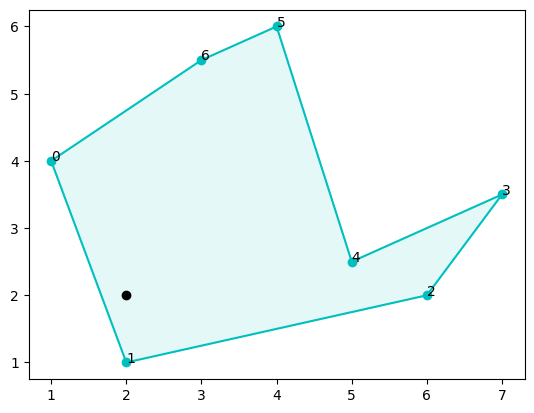

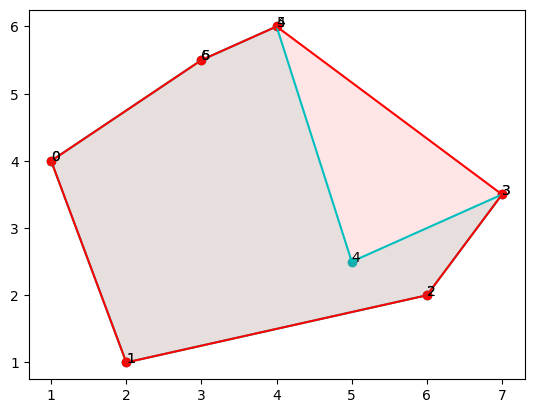

In [7]:
isDebug = False
if isDebug:
    x = [1.0, 2.0, 6.0, 7.0, 5.0, 4.0, 3.0]
    y = [4.0, 1.0, 2.0, 3.5, 2.5, 6.0, 5.5]
    xdot, ydot = 4, 2
else:
    print ("Enter coordinates of points: ")
    x=[]
    y=[]
    while True:
        i = input();
        if not i:
            break
        tmp=i.split(" ")
        x.append(float(tmp[0]))
        y.append(float(tmp[1]))
    print("point to be checked")
    tmp=(input()).split(" ")
    xdot=float(tmp[0])
    ydot=float(tmp[1])

print(x)
print(y)
x2=x.copy()
y2=y.copy()    
x, y = sort_by_angle(x, y)
dccl = DCLL()
for (x0, y0) in zip(x, y):
    dccl.append((x0, y0))
v = dccl.head
w = v.previous
f = False
while(v.next != dccl.head or not f):
    #print(v.data)
    if(v.next == w):
        f = True
        break
    if(not is_right(v.data, v.next.data, v.next.next.data)):
        print("Left")
        v = v.next
    else:
        print("Right")
        dccl.remove_node(v.next)
        v = v.previous
    print(dccl)    
print("")
print("Result ")
print("xdot=",xdot,", ydot=", ydot)
print(isInside(x2,y2,xdot, ydot))
print("non-Convexity:",is_convex(x,y))

plot_polygon(x2,y2)
plt.scatter(xdot, ydot, color="black")
fig, ax = plt.subplots()
plot_polygon(x2, y2, ax)
x1, y1 = convert_dccl_array(dccl)
plot_polygon(x1, y1, ax, color="red")

In [ ]:
# https://www.askpython.com/python/examples/doubly-circular-linked-list